# Model: Random Forest Classifier (Starter Notebook)

## Objective:
Our goal is to predict the **road condition type** based on the vehicle sensor readings.
Specifically, we are interested in classifying whether the vehicle is on:
- Asphalt
- Cobblestone
- Dirt Road

We will be using the **cleaned dataset** prepared from `01_data_cleaning.ipynb`.

## Dataset:
- Path: `dataset/cleaned_master_dataset.csv`
- Shape: 1,080,905 rows, 81 columns (after cleaning)

## Tasks Overview:
- Load the cleaned dataset
- Basic data exploration (optional, feel free to plot if needed)
- Select key features for training
- Train **Random Forest Classifier**
- Evaluate performance (Accuracy, Confusion Matrix, etc.)

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the cleaned master dataset
df = pd.read_csv('../dataset/cleaned_master_dataset.csv')

# Quick check
print(df.shape)
print(df.head())

(1080905, 81)
      timestamp  acc_x_dashboard_left  acc_y_dashboard_left  \
0  1.577219e+09              0.365116              0.167893   
1  1.577219e+09              0.392649              0.176273   
2  1.577219e+09              0.409408              0.181062   
3  1.577219e+09              0.371101              0.164302   
4  1.577219e+09              0.390255              0.159514   

   acc_z_dashboard_left  acc_x_above_suspension_left  \
0              9.793961                     0.327626   
1              9.771216                     0.381496   
2              9.732909                     0.283333   
3              9.749668                     0.314458   
4              9.869378                     0.344385   

   acc_y_above_suspension_left  acc_z_above_suspension_left  \
0                     0.172733                     9.781861   
1                     0.189492                     9.699261   
2                     0.182310                     9.807000   
3                 

## Some EDA here

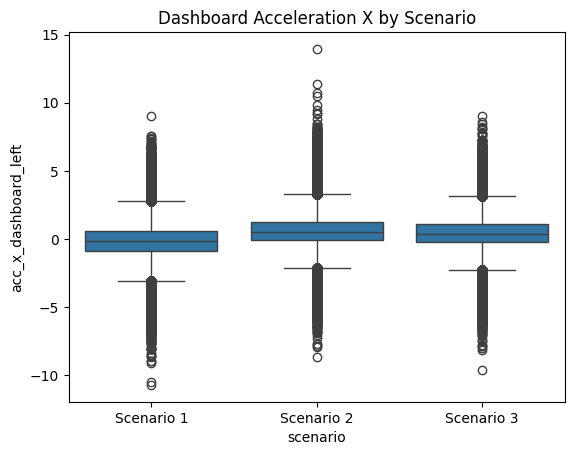

In [3]:
# Ex: Quick EDA - Visualize vibration data or vehicle-specific trends
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='scenario', y='acc_x_dashboard_left', data=df)
plt.title('Dashboard Acceleration X by Scenario')
plt.show()

In [4]:
# Example Feature Selection (This will depend on their work later)
features = df[['acc_x_dashboard_left', 'acc_y_dashboard_left', 'acc_z_dashboard_left']]
target = df['dirt_road']  # Example: Predicting dirt road (0 or 1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7150165833260093
Confusion Matrix:
 [[140407  15779]
 [ 45829  14166]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82    156186
           1       0.47      0.24      0.32     59995

    accuracy                           0.72    216181
   macro avg       0.61      0.57      0.57    216181
weighted avg       0.68      0.72      0.68    216181



In [6]:
# save the model
import pickle

# Save the model to a file
with open('../api/models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)
